# Data Analysis

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
from pysal.lib import examples

/home/elizarraras/anaconda3/envs/global/lib/python3.8/site-packages/pysal/explore/segregation/network/network.py:15: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  warn(
/home/elizarraras/anaconda3/envs/global/lib/python3.8/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


Getting an insight of the data

In [2]:
df_pueblos = pd.read_csv("pueblos_magicos.csv")
df_pueblos

,pueblo_magico,estado,pob_2010,pob_2015
0,Asientos,Aguascalientes,48358,50864
1,Calvillo,Aguascalientes,57627,60760
2,San José de Gracia,Aguascalientes,7160,9661
3,Tecate,Baja California,89999,110870
4,La Paz,Baja California Sur,265717,293687
...,...,...,...,...
118,Jerez,Zacatezas,57610,55114
119,Nochistlán de Mejía,Zacatezas,30114,26855
120,Pinos,Zacatecas,76639,76220
121,Sombrerete,Zacatecas,61188,62433


## Exploratory Data Analysis

- __Q__: What were the ten Pueblos mágicos with the most population in 2015?

First of all, let's investigate if the data has missing values, by summing all the missing values per column:

In [3]:
df_pueblos.isna().sum()

pueblo_magico    0
estado           0
pob_2010         0
pob_2015         0
dtype: int64

The data is fine, let's answer the first question by ordering the dataframe:

In [4]:
(df_pueblos[["pueblo_magico","pob_2015"]]
.sort_values("pob_2015", ascending=False)
.iloc[:10]
.reset_index(drop=True)
)

,pueblo_magico,pob_2015
0,Tlaquepaque,664193
1,La Paz,293687
2,Metepec,219270
3,San Cristóbal de las Casas,206839
4,Guadalupe,189495
5,Papantla,185272
6,Comitán de Domínguez,173188
7,Lagos de Moreno,164981
8,San Andrés Cholula,156754
9,Bahía de Banderas (Sayulita),153793


- __Q__:What were the ten Pueblos mágicos with the least population in 2010?


In [5]:
(df_pueblos[["pueblo_magico","pob_2010"]]
.sort_values("pob_2010")
.iloc[:10]
.reset_index(drop=True)
)

,pueblo_magico,pob_2010
0,Capulálpam de Méndez,1467
1,Candela,1736
2,Guerrero,1946
3,Bustamante,3756
4,Mier,3856
5,San Pedro y San Pablo Teposcolula,3989
6,Teúl de González Ortega,4666
7,San Sebastián del Oeste,5755
8,San José de Gracia,7160
9,Mineral del Chico,7830


## Data Wrangling 
Change Mexico states full ISO for the three characters ISO convention. Store it in a variable called: estado_iso. After that, display the new variable’s unique values. Use the following table as a reference. Data set: Pueblos mágicos de México.

In [6]:
# Processing the copied string from the pdf
states = "Aguascalientes AGU Baja California BCN Baja California Sur BCS Campeche CAM Coahuila COA Colima COL Chiapas CHP Chihuahua CHH Durango DUR Guanajuato GUA Guerrero GRO Hidalgo HID Jalisco JAL Mexico MEX Michoacan MIC Morelos MOR Nayarit NAY Nuevo Leon NLE Oaxaca OAX Puebla PUE Queretaro QUE Quintana Roo ROO San Luis Potosi SLP Sinaloa SIN Sonora SON Tabasco TAB Tamaulipas TAM Tlaxcala TLA Veracruz VER Yucatan YUC Zacatecas ZAC"
states = states.split(" ")
print(states)

['Aguascalientes', 'AGU', 'Baja', 'California', 'BCN', 'Baja', 'California', 'Sur', 'BCS', 'Campeche', 'CAM', 'Coahuila', 'COA', 'Colima', 'COL', 'Chiapas', 'CHP', 'Chihuahua', 'CHH', 'Durango', 'DUR', 'Guanajuato', 'GUA', 'Guerrero', 'GRO', 'Hidalgo', 'HID', 'Jalisco', 'JAL', 'Mexico', 'MEX', 'Michoacan', 'MIC', 'Morelos', 'MOR', 'Nayarit', 'NAY', 'Nuevo', 'Leon', 'NLE', 'Oaxaca', 'OAX', 'Puebla', 'PUE', 'Queretaro', 'QUE', 'Quintana', 'Roo', 'ROO', 'San', 'Luis', 'Potosi', 'SLP', 'Sinaloa', 'SIN', 'Sonora', 'SON', 'Tabasco', 'TAB', 'Tamaulipas', 'TAM', 'Tlaxcala', 'TLA', 'Veracruz', 'VER', 'Yucatan', 'YUC', 'Zacatecas', 'ZAC']


In [7]:
# There are states with multiple words in its ISO, so, lets process the correct ISOs.
correct_ISOs = []
state_ISO = ""
for s in states:
    # if all the word is in upper letters, it means it is the ISO
    if s.isupper():
        # Appending the state ISO and the ISO
        # the variable state_ISO have an extra space at the end, I remove it with the strip()
        correct_ISOs.append(state_ISO.strip())
        correct_ISOs.append(s)
        state_ISO = ""
    else:
        # If the string has lower case letters, it is the state full ISO, the state_ISO varible
        # will concatenate the strings with a space until an ISO is found.
        state_ISO += s
        state_ISO += " "
print(correct_ISOs)

['Aguascalientes', 'AGU', 'Baja California', 'BCN', 'Baja California Sur', 'BCS', 'Campeche', 'CAM', 'Coahuila', 'COA', 'Colima', 'COL', 'Chiapas', 'CHP', 'Chihuahua', 'CHH', 'Durango', 'DUR', 'Guanajuato', 'GUA', 'Guerrero', 'GRO', 'Hidalgo', 'HID', 'Jalisco', 'JAL', 'Mexico', 'MEX', 'Michoacan', 'MIC', 'Morelos', 'MOR', 'Nayarit', 'NAY', 'Nuevo Leon', 'NLE', 'Oaxaca', 'OAX', 'Puebla', 'PUE', 'Queretaro', 'QUE', 'Quintana Roo', 'ROO', 'San Luis Potosi', 'SLP', 'Sinaloa', 'SIN', 'Sonora', 'SON', 'Tabasco', 'TAB', 'Tamaulipas', 'TAM', 'Tlaxcala', 'TLA', 'Veracruz', 'VER', 'Yucatan', 'YUC', 'Zacatecas', 'ZAC']


In [8]:
# Dicctionary to replace values
iso_states = {}
# It is not Pythonic, but it is easier to traverse the list with the index in order to
# make the relationship. Even indexes are the ISO and the odd ones are the states
for i in range(0, len(correct_ISOs) - 1, 2):
    iso_states[correct_ISOs[i]] = correct_ISOs[i+1]
print(iso_states)

{'Aguascalientes': 'AGU', 'Baja California': 'BCN', 'Baja California Sur': 'BCS', 'Campeche': 'CAM', 'Coahuila': 'COA', 'Colima': 'COL', 'Chiapas': 'CHP', 'Chihuahua': 'CHH', 'Durango': 'DUR', 'Guanajuato': 'GUA', 'Guerrero': 'GRO', 'Hidalgo': 'HID', 'Jalisco': 'JAL', 'Mexico': 'MEX', 'Michoacan': 'MIC', 'Morelos': 'MOR', 'Nayarit': 'NAY', 'Nuevo Leon': 'NLE', 'Oaxaca': 'OAX', 'Puebla': 'PUE', 'Queretaro': 'QUE', 'Quintana Roo': 'ROO', 'San Luis Potosi': 'SLP', 'Sinaloa': 'SIN', 'Sonora': 'SON', 'Tabasco': 'TAB', 'Tamaulipas': 'TAM', 'Tlaxcala': 'TLA', 'Veracruz': 'VER', 'Yucatan': 'YUC', 'Zacatecas': 'ZAC'}


Let's check if there are any misspelled state ISO

In [9]:
state_ISOs_from_dataset = df_pueblos["estado"].value_counts().index
for state in state_ISOs_from_dataset:
    if state not in iso_states.keys():
        print("This state was not found:", state)

This state was not found: Zacatezas


By counting the unique values we can reassure the cell above

In [10]:
df_pueblos["estado"].value_counts()

Puebla                 10
Mexico                 10
Jalisco                 8
Michoacan               8
Coahuila                7
Veracruz                6
Guanajuato              6
Queretaro               6
Hidalgo                 6
Oaxaca                  5
Sinaloa                 4
Chiapas                 4
Aguascalientes          3
Nuevo Leon              3
San Luis Potosi         3
Zacatezas               3
Quintana Roo            3
Nayarit                 3
Chihuahua               3
Zacatecas               3
Morelos                 2
Durango                 2
Sonora                  2
Tamaulipas              2
Tlaxcala                2
Yucatan                 2
Baja California Sur     2
Baja California         1
Guerrero                1
Colima                  1
Tabasco                 1
Campeche                1
Name: estado, dtype: int64

The easiest way to fix this, is by adding the misspeled state into the dict _iso_states_

In [11]:
iso_states["Zacatezas"] = "ZAC"
# If there would have been more values, I would have done by iterativing. It is only to be more explicit.

Now, we need to change the state ISOs for the ISO

In [12]:
estado_iso = df_pueblos["estado"].replace(iso_states)
estado_iso

0      AGU
1      AGU
2      AGU
3      BCN
4      BCS
      ... 
118    ZAC
119    ZAC
120    ZAC
121    ZAC
122    ZAC
Name: estado, Length: 123, dtype: object

In [13]:
estado_iso.value_counts()

PUE    10
MEX    10
JAL     8
MIC     8
COA     7
ZAC     6
VER     6
QUE     6
GUA     6
HID     6
OAX     5
SIN     4
CHP     4
NLE     3
SLP     3
ROO     3
AGU     3
NAY     3
CHH     3
DUR     2
SON     2
TAM     2
TLA     2
BCS     2
YUC     2
MOR     2
BCN     1
GRO     1
COL     1
CAM     1
TAB     1
Name: estado, dtype: int64

We can prove this is right by adding the numbers in "Zacatecas" and "Zacatezas" in the output of _df_pueblos["estado"].value_counts()_, 3 + 3 = 6. And 6 is the number of ZAC uniques values.

## Analysis
 The leadership team wants to review the historical evolution of __International__ tourism in Mexico. Use the Histórico de turismo en México data set to elaborate an executive summary of a document that depicts the answer to the leadership team’s request. Justify your answers. Data set: Tourism in Mexico over time. 

In [14]:
turism_df = pd.read_csv("turismo_mexico.csv")
turism_df

,fecha,visitantes_internacionales,turismo_al_interior,turismo_fronterizo,excursionistas _fronterizos,pasajeros_crucero
0,01/01/16,7808,1690,1152,4332,634
1,01/02/16,7666,1683,1048,4250,685
2,01/03/16,8625,1983,1224,4678,739
3,01/04/16,7717,1601,1083,4451,582
4,01/05/16,7665,1548,1154,4538,424
...,...,...,...,...,...,...
66,01/07/21,5330,2021,1364,1900,46
67,01/08/21,4622,1436,1337,1748,101
68,01/09/21,4379,1251,1205,1747,176
69,01/10/21,4942,1597,1190,1873,282


In [15]:
turism_df["fecha"] = turism_df["fecha"].apply(lambda s: s.replace("/", "-"))
turism_df["month"] = turism_df["fecha"].apply(lambda s: s.split("-")[1])
turism_df["year"] = turism_df["fecha"].apply(lambda s: s.split("-")[2])
turism_df

,fecha,visitantes_internacionales,turismo_al_interior,turismo_fronterizo,excursionistas _fronterizos,pasajeros_crucero,month,year
0,01-01-16,7808,1690,1152,4332,634,01,16
1,01-02-16,7666,1683,1048,4250,685,02,16
2,01-03-16,8625,1983,1224,4678,739,03,16
3,01-04-16,7717,1601,1083,4451,582,04,16
4,01-05-16,7665,1548,1154,4538,424,05,16
...,...,...,...,...,...,...,...,...
66,01-07-21,5330,2021,1364,1900,46,07,21
67,01-08-21,4622,1436,1337,1748,101,08,21
68,01-09-21,4379,1251,1205,1747,176,09,21
69,01-10-21,4942,1597,1190,1873,282,10,21


The most effective way to communicate how Mexico's turism has evolved in the past few years is by doing some visualizations. The following chart shows the total number of international visitors from 01-2016 to 11-2021. We can observe that because of the worldwide lockdowns due to the virus SARS-CoV-2, the turism was seriously affected, by April 2020 it was reduced $73\%$ since its high in December 2019, and little by little it is growing again, because a lot of the world it is already vaccinated.

Text(0, 0.5, 'International visitors [millions]')

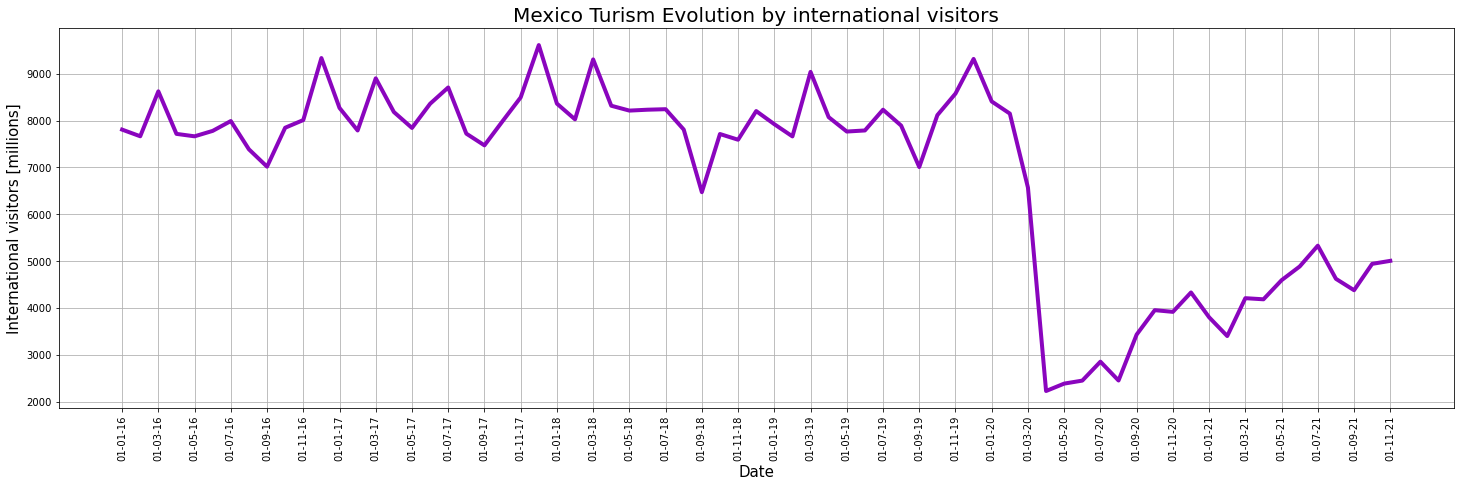

In [16]:
import matplotlib.dates as mdates
pd.to_datetime(turism_df.fecha)
ax = turism_df.plot(x="fecha", y="visitantes_internacionales", figsize=((25,7)),
               linewidth=4, legend=False, grid=True, rot=90, color="#8A05BE") 
ax.set_title("Mexico Turism Evolution by international visitors", fontsize=20)
ax.set_xticks(range(0, len(turism_df["fecha"].values), 2), turism_df["fecha"].values[::2])
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("International visitors [millions]", fontsize=15)


Let's get some more insights in the data. With this plot we can observe that before the pandemic, there was a growing in the turism and also there were months with more visitors than others, like __March__, __December__ and maybe __July__, this may be due to the holidays in other countries. In the other hand, the month with least visitors was __September__, and the other months were really similar regarding international visitors. Finally, as reported above, the pandemic caused a lot less traveling, so the Turism was affected negatively.

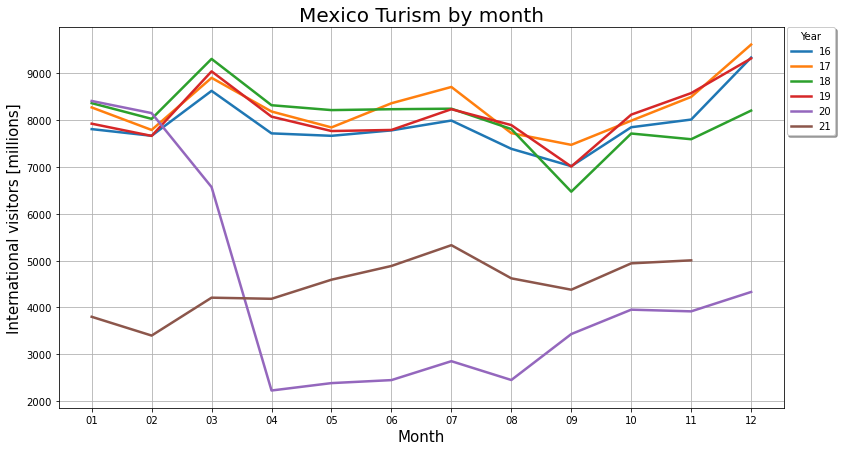

In [17]:
turism_byyear_df = turism_df.groupby("year")
fig, ax = plt.subplots(figsize=(13,7))
for key, grp in turism_byyear_df:
    ax.plot(grp["month"], grp['visitantes_internacionales'], label=key, linewidth=2.5) 
ax.set_title("Mexico Turism by month", fontsize=20)
ax.set_xlabel("Month", fontsize=15)
ax.set_ylabel("International visitors [millions]", fontsize=15)
fig.legend(title="Year", bbox_to_anchor=(0.96, .89), fancybox=True, shadow=True)
ax.grid()


I want to know the mean quantity of each type of tourists in each year, the following code is for this purpose.

In [18]:
pc_df = turism_byyear_df.describe()["pasajeros_crucero"]["mean"]
ti_df = turism_byyear_df.describe()["turismo_al_interior"]["mean"]
tf_df = turism_byyear_df.describe()["turismo_fronterizo"]["mean"]
ef_df = turism_byyear_df.describe()["excursionistas _fronterizos"]["mean"]
tourism_type_df = pd.concat([pc_df, ti_df, tf_df, ef_df], axis=1)
tourism_type_df

,mean,mean,mean,mean
year,,,,
16,557.916667,1721.833333,1201.333333,4423.166667
17,640.083333,1873.500000,1400.666667,4364.750000
18,689.333333,1942.333333,1500.666667,3909.416667
19,758.000000,1979.833333,1772.250000,3607.250000
20,215.000000,901.250000,1122.416667,2022.000000
21,101.000000,1402.000000,1161.454545,1822.181818


With these pie charts we can see the porcentages of the type of visitors, the dominant type is "Excusionistas fronterisos" and the least is "Pasajeros de crucero". The porcentages of each type don't change a lot during the years (1-5%).

Text(0.5, 0.98, 'Types of tourists that visit Mexico')

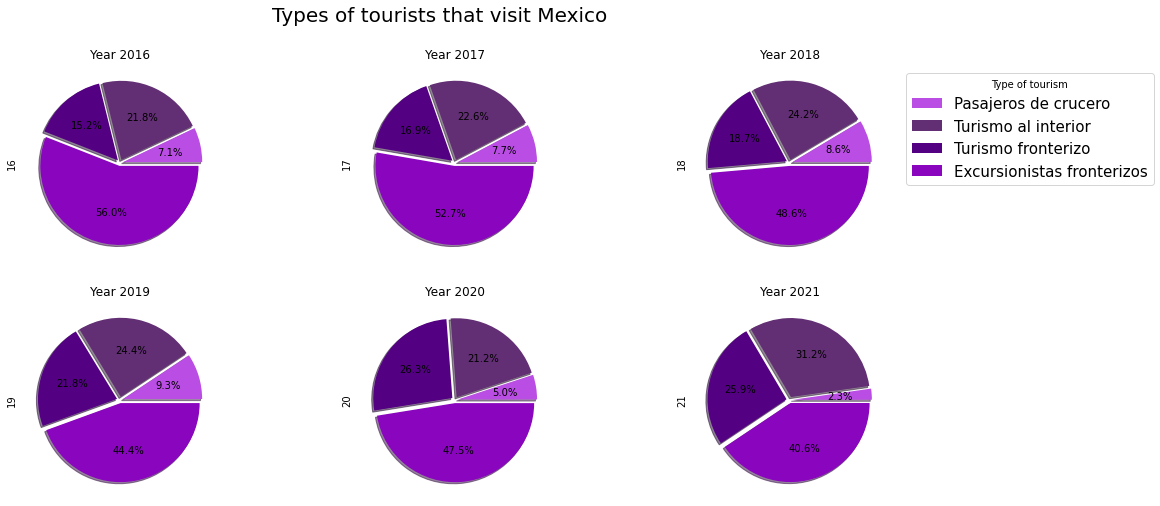

In [19]:
fig, axes = plt.subplots(2,3, figsize=(17,8))
axes = axes.flat
labels = ["Pasajeros de crucero", "Turismo al interior", "Turismo fronterizo", "Excursionistas fronterizos"]
colors = ["#BA4DE3", "#632F74", "#530082","#8A05BE" ]
# iterating to plot each row as a pie chart
for i, ind in enumerate(tourism_type_df.index):
    tourism_type_df.loc[ind].plot(kind='pie', ax=axes[i], autopct='%1.1f%%', labels=None, 
                                  title="Year 20"+str(ind), shadow=True, explode=[0.04]*4, colors=colors)
axes[2].legend(title="Type of tourism", loc=3, labels=labels, bbox_to_anchor=(1.05, 0.35), fontsize=15)
fig.suptitle("Types of tourists that visit Mexico", fontsize=20)

## Creativity to communicate analytical results 
The Leadership team wants to know the number of Pueblos mágicos in each state. You, therefore, create an analysis. How would you communicate your results? Important: The leadership team has a non-technical background, so you might find data visualization techniques helpful. Elaborate a paragraph describing how to interpret your results and justify your answers. Data set: Pueblos mágicos de México.

### Doing a Mexico density map based on how many pueblos magicos there are:

In [20]:
mex_geodf = geopandas.read_file(examples.get_path("mexicojoin.shp"))
mex_geodf.crs = "EPSG:4326"

In [21]:
# After exploring this dataset, some state have diferent names, so this
# way I will replace those names with the ISO code.
iso_states["Distrito Federal"] = "DF"
iso_states["Baja California Norte"] = "BCN"
iso_states["Coahuila De Zaragoza"] = "COA"
iso_states["Michoacan de Ocampo"] = "MIC"
iso_states["Queretaro de Arteaga"] = "QUE"
iso_states["Veracruz-Llave"] = "VER"

In [22]:
# processing the count pueblos magicos data to be able to concat it with the
# gis data of Mexico
count_pueblos_df = estado_iso.value_counts()
count_pueblos_df = (count_pueblos_df.append(pd.Series([0], index=["DF"]))
          .reset_index()
          .rename({"index":"ISO", 0: "Pueblos magicos count"}, axis=1)
          .sort_values("ISO")
          .reset_index(drop=True))

In [23]:
# concatenaing all the data
mex_geodf["NAME"] = mex_geodf["NAME"].replace(iso_states)
mex_geodf = mex_geodf.sort_values(by=["NAME"]).reset_index(drop=True)
pueblos_geografy_geodf = pd.concat([mex_geodf, count_pueblos_df], axis=1)

<AxesSubplot:>

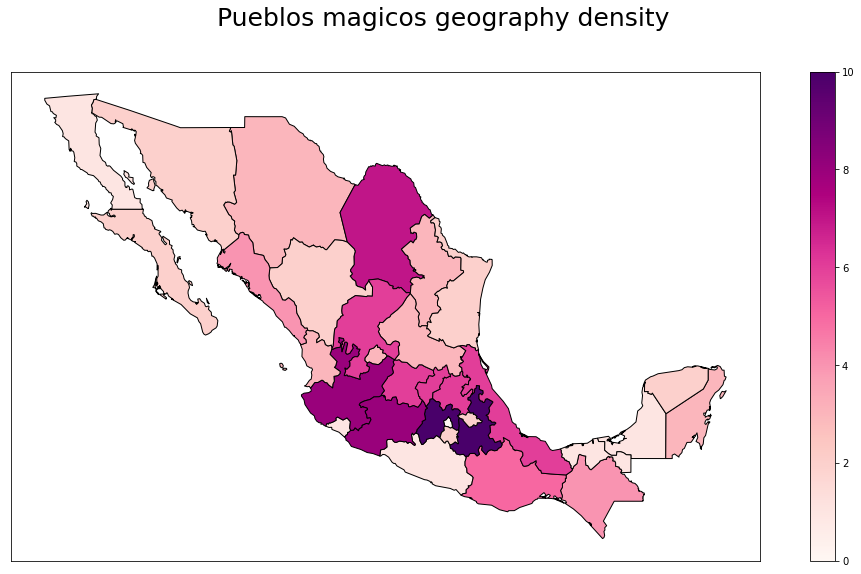

In [24]:
# doing the visualization
fig, ax = plt.subplots(1, figsize=(18,9))
fig.suptitle("Pueblos magicos geography density", fontsize=25)
ax.set_xticks([])
ax.set_yticks([])
pueblos_geografy_geodf.plot(
    column="Pueblos magicos count", 
    legend=True, ax=ax, cmap="RdPu",
    edgecolor="black"
)

In [25]:
# Explaining colors of the above map
count_pueblos_df.style.background_gradient(cmap="RdPu")

,ISO,Pueblos magicos count
0,AGU,3
1,BCN,1
2,BCS,2
3,CAM,1
4,CHH,3
5,CHP,4
6,COA,7
7,COL,1
8,DF,0
9,DUR,2


With this two visualitions, it is undestandable the information only by sight, without explaining something.